In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("Set2")

#Extraction
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vehicles_messy.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [ ]:
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,...,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,...,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,...,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,...,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,...,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,...,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [ ]:
def data_cleaning(data):

  hybrid = ['EV', 'Hybrid', 'Plug-in Hybrid']
  data = data[~data['atvType'].isin(hybrid)]
  
  #Counting null registers, and drop columns that have more than 10,000 null registers
  null_cols = data.isnull().sum()
  drop_cols = list(null_cols[null_cols > 10000].index)
  data = data.drop(drop_cols, axis=1)

  #Fill Null registers with 0
  null_displ = data[(data['displ'].isnull()==True)]
  null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
  data[['displ', 'cylinders']] = data[['displ', 'cylinders']].fillna(0)
  data.fillna(0,inplace=True)

  data.loc[(data['cylinders']==0) & (data['displ']!=0), 'cylinders'] = 4

  #Finding Outliers 
  low_variance = []
  for col in data._get_numeric_data():
    minimum = min(data[col])
    ninty_perc = np.percentile(data[col], 90)
    if ninty_perc == minimum:
        low_variance.append(col)

  data = data.drop(low_variance, axis=1)

  #Drop Electric Cars
  fuelType_electric = ['Electricity', 'Premium Gas or Electricity', 'Regular Gas and Electricity', 'Premium and Electricity', 'Regular Gas or Electricity']
  data = data[~data['fuelType'].isin(fuelType_electric)]


  
  data['year'] = data['year'].astype('object')
  set(data['trany'])
  data['trany'] = data['trany'].str.replace('-', '')
  set(data['trany'])
  data['trany'] = data['trany'].str.replace('Automatic', 'Auto')
  data['trany'] = data['trany'].str.replace('Auto\(', 'Auto ')
  data['trany'] = data['trany'].str.replace('Manual\(', 'Manual ')
  data['trany'] = data['trany'].str.replace('\(', '')
  data['trany'] = data['trany'].str.replace('\)', '')
  data['trany'] = data['trany'].str.replace('5 ', '5')
  data = data.drop_duplicates()
  select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 
                  'trany', 'drive', 'VClass','fuelType','barrels08', 
                  'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']
  data = data[select_columns].drop_duplicates()
  data.columns = ['Manufacturer','Model','Year','Displacement',
               'Cylinders','Transmission','Drivetrain',
               'Vehicle Class','Fuel Type','Fuel Barrels/Year',
               'City MPG','Highway MPG','Combined MPG',
               'CO2 Emission Grams/Mile','Fuel Cost/Year']

  data = data.rename(columns={'Manufacturer': 'Make', 'Displacement':'Engine Displacement'})
  column_order = ['Year','Make','Model','Vehicle Class',
                  'Transmission','Drivetrain','Fuel Type',
                  'Cylinders','Engine Displacement','Fuel Barrels/Year',
                  'City MPG','Highway MPG','Combined MPG',
                  'CO2 Emission Grams/Mile','Fuel Cost/Year']
  data = data[column_order]
  return data


In [ ]:
data_clean = data_cleaning(data)

In [ ]:
data_clean.head()

,Year,Make,Model,Vehicle Class,Transmission,Drivetrain,Fuel Type,Cylinders,Engine Displacement,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1985,Alfa Romeo,Spider Veloce 2000,Two Seaters,Manual 5spd,Rear-Wheel Drive,Regular,4.0,2.0,15.695714,19,25,21,423.190476,1600
1,1985,Ferrari,Testarossa,Two Seaters,Manual 5spd,Rear-Wheel Drive,Regular,12.0,4.9,29.964545,9,14,11,807.909091,3050
2,1985,Dodge,Charger,Subcompact Cars,Manual 5spd,Front-Wheel Drive,Regular,4.0,2.2,12.207778,23,33,27,329.148148,1250
3,1985,Dodge,B150/B250 Wagon 2WD,Vans,Auto 3spd,Rear-Wheel Drive,Regular,8.0,5.2,29.964545,10,12,11,807.909091,3050
4,1993,Subaru,Legacy AWD Turbo,Compact Cars,Manual 5spd,4-Wheel or All-Wheel Drive,Premium,4.0,2.2,17.347895,17,23,19,467.736842,2150


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36319 entries, 0 to 37842
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     36319 non-null  object 
 1   Make                     36319 non-null  object 
 2   Model                    36319 non-null  object 
 3   Vehicle Class            36319 non-null  object 
 4   Transmission             36317 non-null  object 
 5   Drivetrain               36319 non-null  object 
 6   Fuel Type                36319 non-null  object 
 7   Cylinders                36319 non-null  float64
 8   Engine Displacement      36319 non-null  float64
 9   Fuel Barrels/Year        36319 non-null  float64
 10  City MPG                 36319 non-null  int64  
 11  Highway MPG              36319 non-null  int64  
 12  Combined MPG             36319 non-null  int64  
 13  CO2 Emission Grams/Mile  36319 non-null  float64
 14  Fuel Cost/Year        

##
Top 10 Manufacturers by CO2 mission

---



In [ ]:
def top_emission(year):
  filtered = data_clean[data_clean['Year']==year]
  grouped = filtered.groupby('Make').agg({'CO2 Emission Grams/Mile':'mean'}).reset_index()
  results = grouped.sort_values('CO2 Emission Grams/Mile', ascending=True).head(10)
  title = 'Top 10 Manufacturers by CO2 Emission ' + str(year)
  fig, ax = plt.subplots(figsize=(15,8))
  barchart = sns.barplot(data=results, x='Make', y='CO2 Emission Grams/Mile')
  plt.title(title + "\n", fontsize=16)


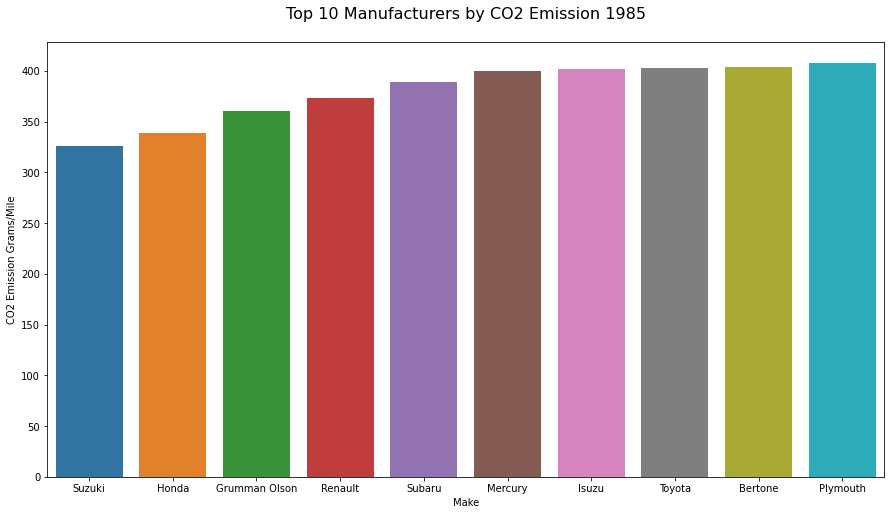

In [ ]:
top_emission(1985)

## Top 10 manufacturers by Fuel Efficency by Year

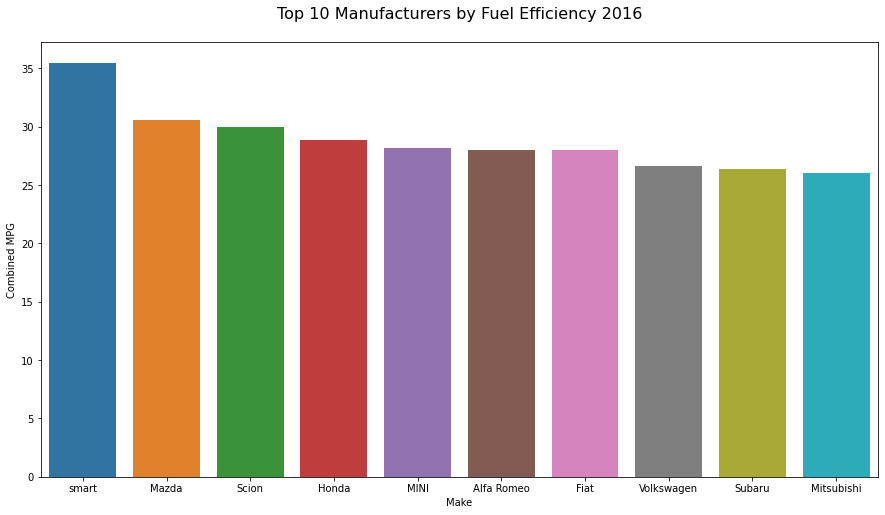

In [ ]:
def top_fuel(year):
  filtered = data_clean[data_clean['Year']==year]
  grouped = filtered.groupby('Make').agg({'Combined MPG':'mean'}).reset_index()
  results = grouped.sort_values('Combined MPG', ascending=False).head(10)
  title = 'Top 10 Manufacturers by Fuel Efficiency ' + str(year)
  fig, ax = plt.subplots(figsize=(15,8))
  barchart = sns.barplot(data=results, x='Make', y='Combined MPG')
  plt.title(title + "\n", fontsize=16)
top_fuel(2016)

Text(0.5, 1.0, 'Distribution of Engine Displacement')

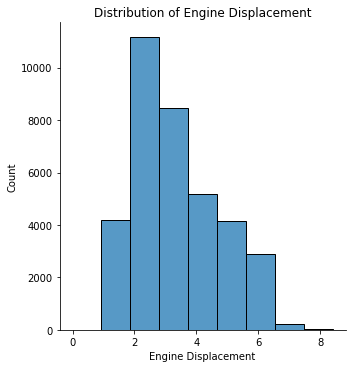

In [ ]:
sns.displot(data_clean['Engine Displacement'], bins=9)
plt.title('Distribution of ' + str('Engine Displacement'))

19.0

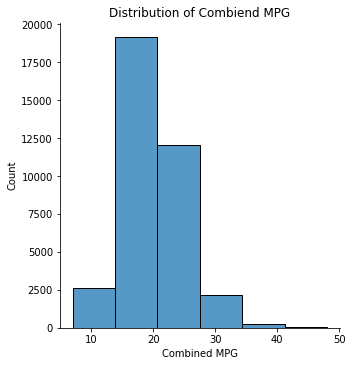

In [ ]:
sns.displot(data_clean['Combined MPG'], bins=6)
plt.title('Distribution of ' + str('Combiend MPG'))
data_clean['Combined MPG'].median()

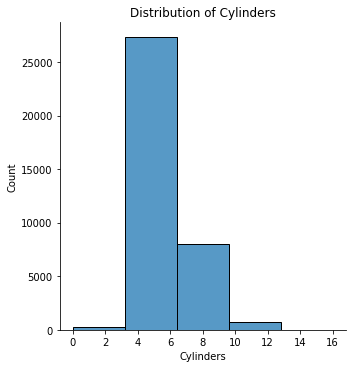

In [ ]:
sns.displot(data_clean['Cylinders'], bins=5)
plt.title('Distribution of ' + str('Cylinders'));

## Fuel

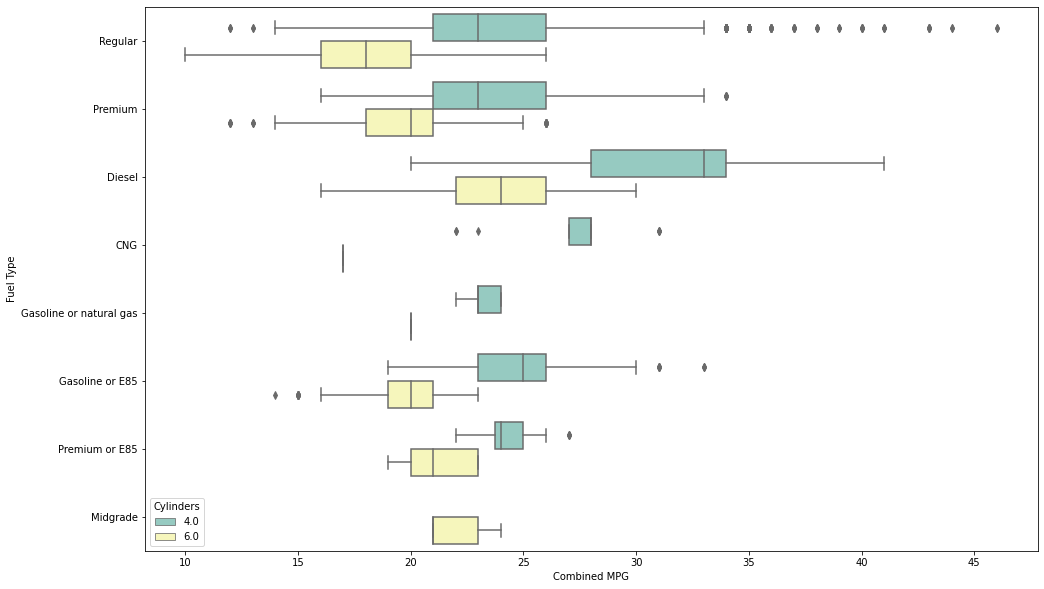

In [ ]:
def Fuel_MPG(MPG_, kind_='box', cyl = [6.0,4.0]):
  data_clean.Cylinders.isin(cyl)
  data1 = data_clean[data_clean.Cylinders.isin(cyl)]
  if kind_=='bar':
    ax = sns.barplot(y="Fuel Type", x=MPG_, hue="Cylinders", data=data1, orient='h')
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  elif kind_=='box':
    plt.figure(figsize=(16,10))
    ax = sns.boxplot(y="Fuel Type", x=MPG_, hue="Cylinders",data=data1, palette="Set3")
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
Fuel_MPG('Combined MPG', kind_='box', cyl=[4.0, 6.0])

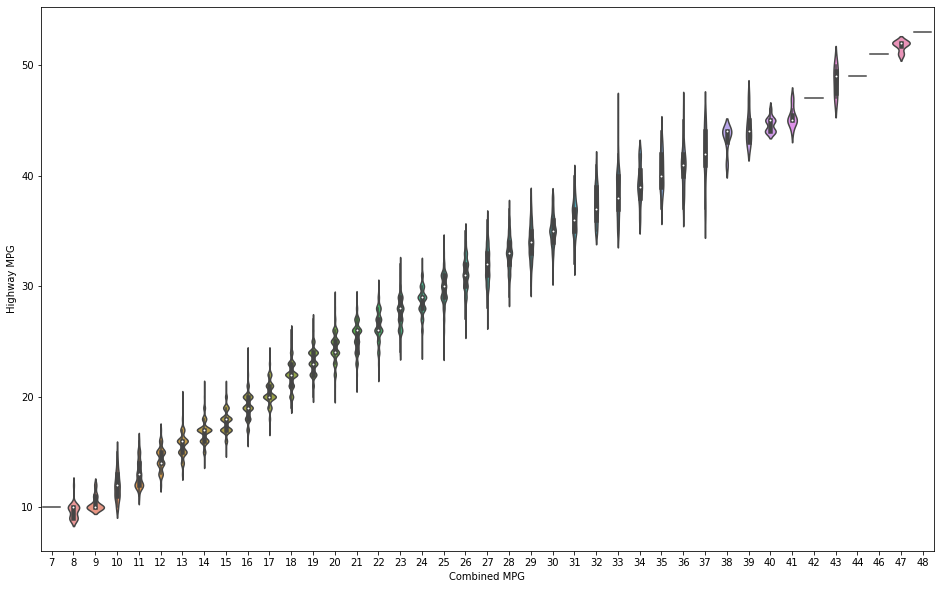

In [ ]:
plt.figure(figsize=(16,10))
sns.violinplot(x="Combined MPG", y='Highway MPG', data=data_clean);

## Barrells/Year Distribution

In [ ]:
def fuel_dis(unit):
  if unit=='Barrells':
    sns.distplot(data_clean['Fuel Barrels/Year'], bins=50);
  else:
     sns.distplot(data_clean['Fuel Cost/Year'], bins=50);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


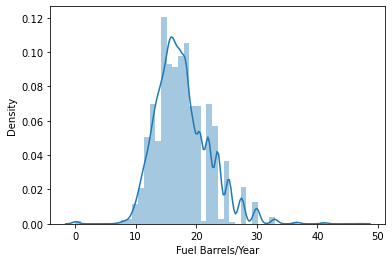

In [ ]:
fuel_dis('Barrells')

## *CO2 Emition Compared with different MPG*

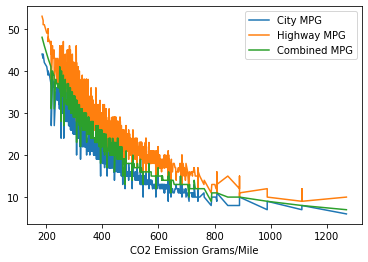

In [ ]:
data2 = data_clean.sort_values(by=["CO2 Emission Grams/Mile", "City MPG", "Highway MPG"])
data2.plot(x="CO2 Emission Grams/Mile", y=["City MPG", "Highway MPG", 'Combined MPG']);

## Highway MPG vs City MPG


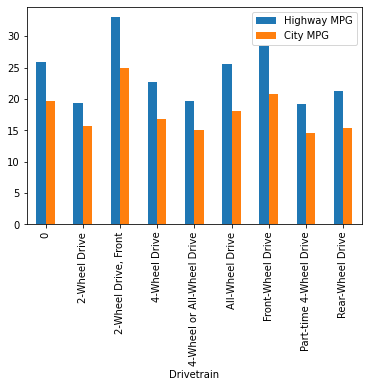

In [ ]:
vehicles_mean = data_clean[["Highway MPG", "City MPG", "Drivetrain"]].groupby(["Drivetrain"]).agg("mean")
vehicles_mean.plot.bar();

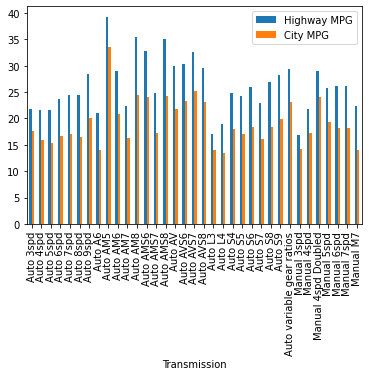

In [ ]:
vehicles_transmission = data_clean[["Highway MPG", "City MPG", "Transmission"]].groupby(["Transmission"]).agg("mean")
vehicles_transmission.plot.bar();

#CO2 Mean Emission Grams/Mile


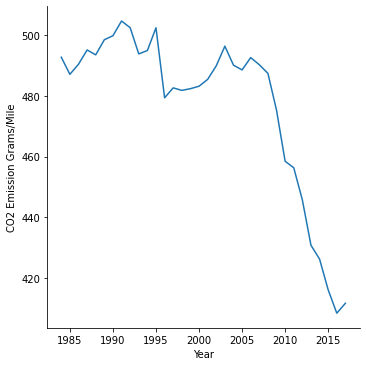

In [ ]:
data_emmision = data_clean[['CO2 Emission Grams/Mile', 'Year', 'Make']].groupby(['Year']).agg('mean').sort_values(['Year'])

sns.relplot(
    data=data_emmision,
    x="Year", y="CO2 Emission Grams/Mile",
    kind="line"
    );

CO2 Emission Grams/Mile by model


In [ ]:
data_emmision_= data_clean[['CO2 Emission Grams/Mile', 'Year', 'Make', 'Model']].groupby(['Model', 'Year']).agg('mean')

In [ ]:
def CO2_Emmision_bymodel(model_):
  data_emmision_m=data_emmision_.loc[model_]
  sns.relplot(
    data=data_emmision_m,
    x="Year", y="CO2 Emission Grams/Mile",
    kind="line"
    )

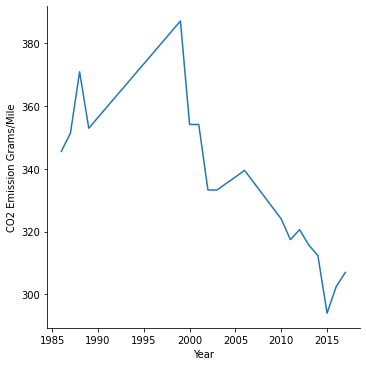

In [ ]:
#example 'Golf'
CO2_Emmision_bymodel(model_='Golf')

## CO2_Emmision by Manufacturer

In [ ]:
data_emmision_2= data_clean[['CO2 Emission Grams/Mile', 'Year', 'Make', 'Model']].groupby(['Make', 'Model', 'Year']).agg('mean')

In [ ]:
def CO2_Emmision_bymanufacturer(make_):
  data_emmision_make=data_emmision_2.loc[make_]
  sns.relplot(
    data=data_emmision_make,
    x="Year", y="CO2 Emission Grams/Mile",
    hue="Model",
    #kind="line", 
    #facet_kws=dict(sharex=False)
  )

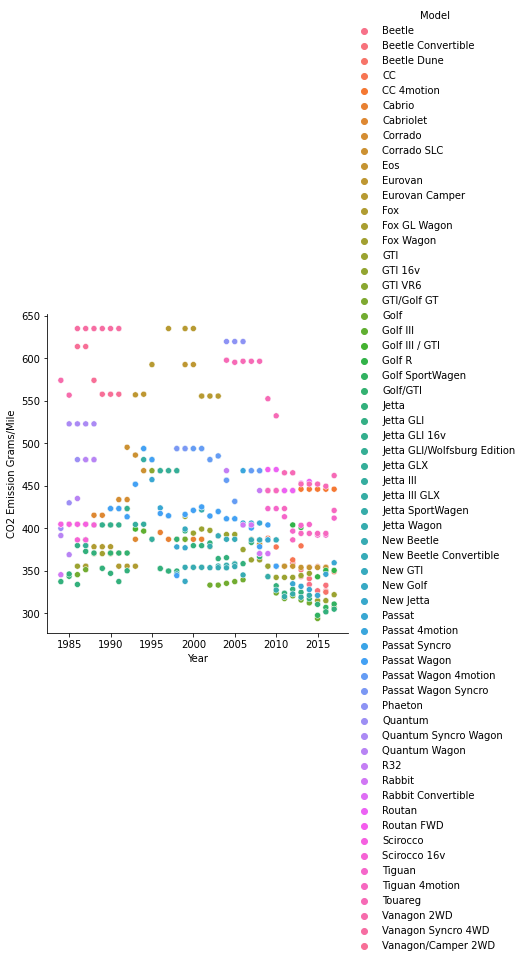

In [ ]:
#example 'Volkswagen'
CO2_Emmision_bymanufacturer('Volkswagen')

CO2 Mean Emission Grams/Mile by Manufacturer


In [ ]:
data_mpg_= data_clean[['CO2 Emission Grams/Mile', 'Year', 'Make', 'Model', 'Combined MPG']].groupby(['Make', 'Model', 'Year']).agg('mean')

In [ ]:
#
def CO2_Emmision_bymanufacturer(make_):
  data_emmision_make=data_mpg_.loc[make_]
  sns.relplot(
    data=data_emmision_make,
    x="Year", y="CO2 Emission Grams/Mile",
    hue="Model", size='Combined MPG'
    #kind="line", 
    #facet_kws=dict(sharex=False)
    )
  plt.title('CO2 Emmision by ' + str(make_)+' models')

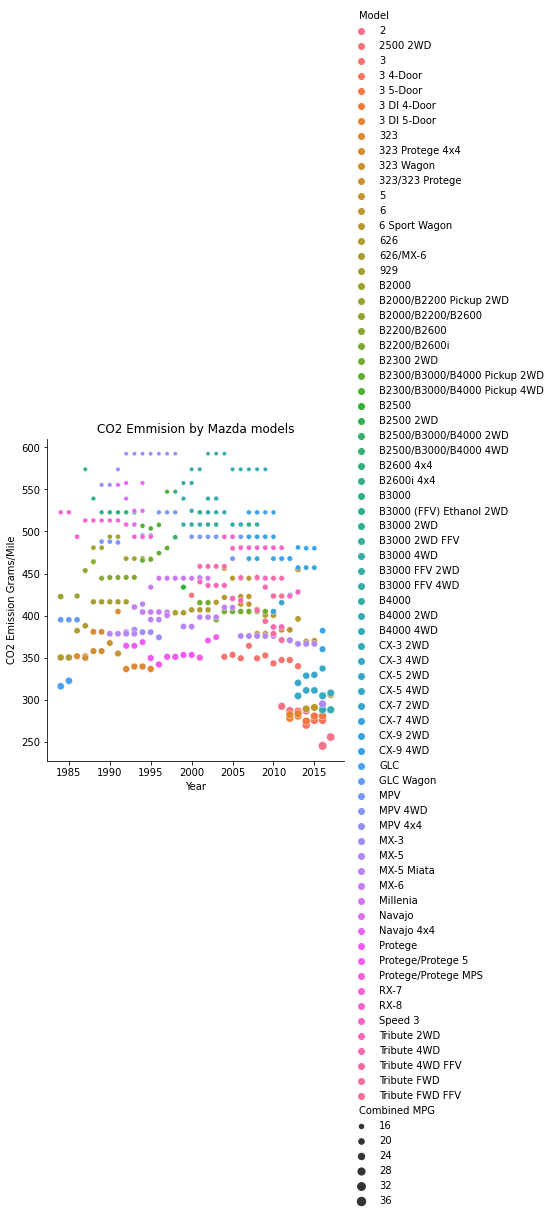

In [ ]:
CO2_Emmision_bymanufacturer('Mazda')

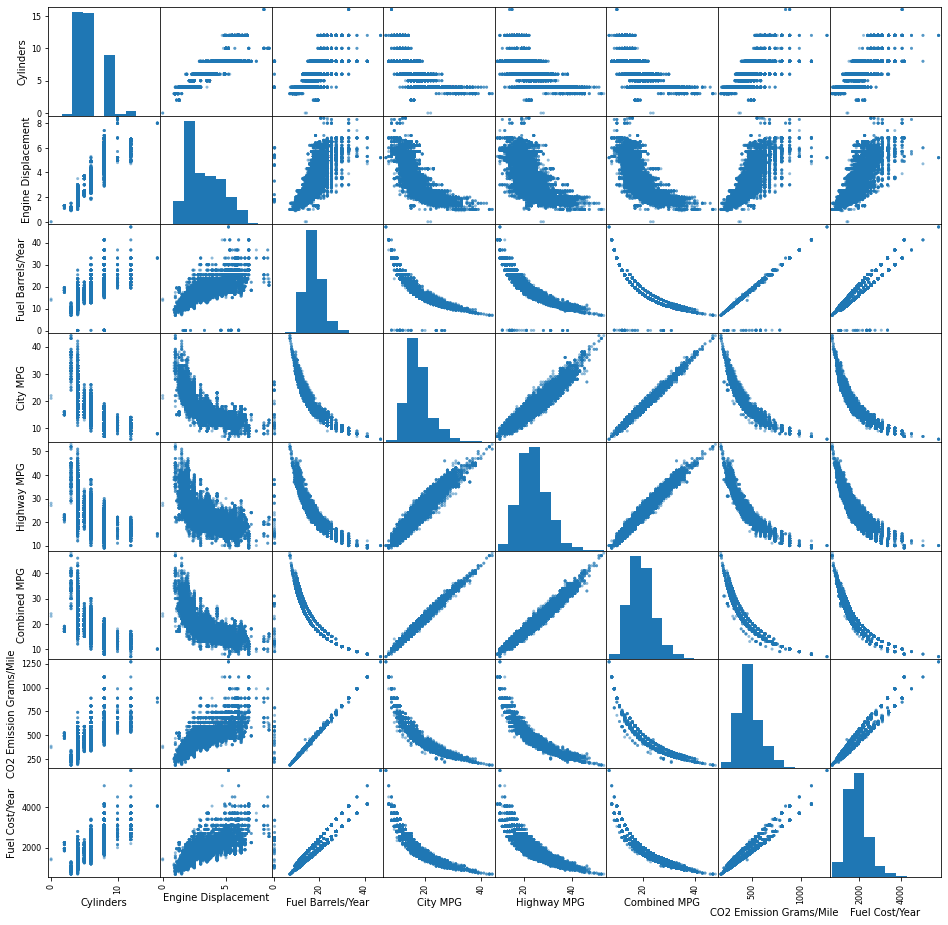

In [ ]:
pd.plotting.scatter_matrix(data_clean, figsize=(16,16));
